In [1]:
import results

scores = results.scores
scores

{'age': {'marker': 'o',
  'FT': [{'model': 'BERT base uncased',
    'f1': 0.66,
    'precision': 0.84,
    'recall': 0.54},
   {'model': 'BERT large uncased',
    'f1': 0.63,
    'precision': 0.87,
    'recall': 0.5},
   {'model': 'RoBERTa base', 'f1': 0.63, 'precision': 0.8, 'recall': 0.51},
   {'model': 'RoBERTa large', 'f1': 0.61, 'precision': 0.86, 'recall': 0.47},
   {'model': 'Flan T5 XL', 'f1': 0.71, 'precision': 0.89, 'recall': 0.59},
   {'model': 'Phi3 3.8B 4k', 'f1': 0.55, 'precision': 0.89, 'recall': 0.4},
   {'model': 'Gemma2-9B', 'f1': 0.65, 'precision': 0.72, 'recall': 0.6},
   {'model': 'Llama3-8B', 'f1': 0.63, 'precision': 0.91, 'recall': 0.49}],
  'PROMPT': {'pZS': [{'model': 'GPT-4o',
     'f1': 0.7,
     'precision': 0.75,
     'recall': 0.66},
    {'model': 'Gemma2-9B', 'f1': 0.58, 'precision': 0.72, 'recall': 0.49},
    {'model': 'Llama3-8B', 'f1': 0.33, 'precision': 0.74, 'recall': 0.21},
    {'model': 'Phi3-7B 8k', 'f1': 0.64, 'precision': 0.62, 'recall': 0.66}],

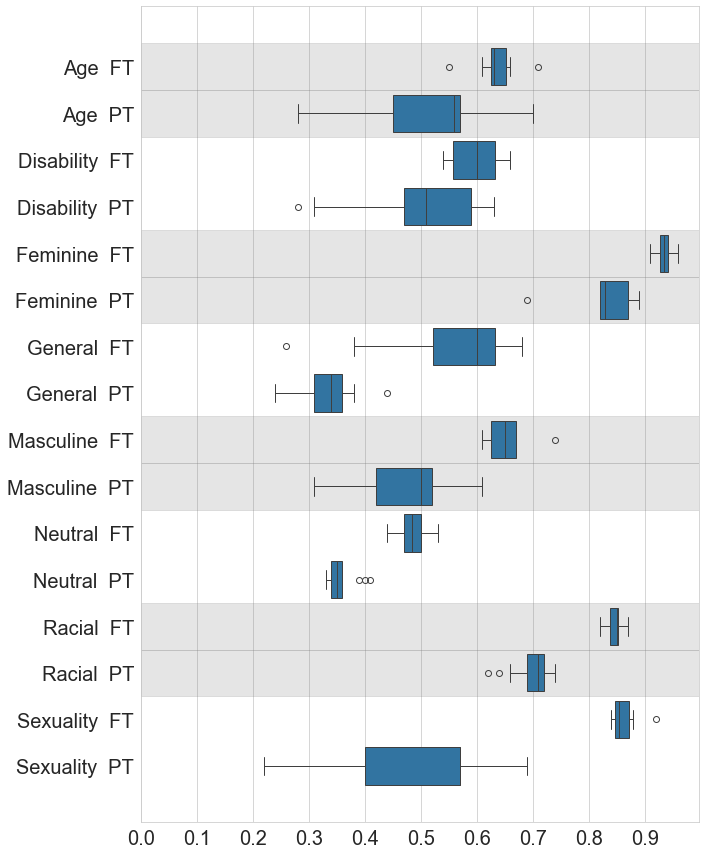

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = []

y1_labels = []
y2_labels = []
for category, s in scores.items():
    for k,v in s.items():
        if k == 'FT' or k == 'PROMPT':
            gt = 'FT' if k == 'FT' else 'PT'
            group = f'{category.title()}  {gt}'
            y1_labels.append(category)
            y2_labels.append(k)
            if k == 'FT':
                for score in s[k]:
                    data.append({'group': group,'type':gt, 'f1': score['f1']})
            else:
                for type in s[k]:
                    for score in s[k][type]:
                        data.append({'group': group, 'type':gt, 'f1': score['f1']})

df = pd.DataFrame(data)

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 15))
ax1 = sns.boxplot(y='group', x='f1', data=df)

medians = df.groupby(['group'])['f1'].median().values
pos = range(len(medians))
#for tick, value in zip(pos, medians):
#    box_plot.axvline(value, color='r', linestyle='--')

# Add horizontal bands
y_ticks = ax1.get_yticks()
for i, y in enumerate(y_ticks):
    if i % 4 == 0:
        ax1.axhspan(y - 0.5, y + 0.5, color='grey', alpha=0.2)
        ax1.axhspan(y + 1.5, y + 0.5, color='grey', alpha=0.2)



# Add secondary y-axis
#ax2 = ax1.twinx()
#ax2.set_yticks(ax1.get_yticks())
#ax2.set_yticklabels(y2_labels)
#ax2.set_ylim(ax1.get_ylim())

plt.xticks( [i / 10 for i in range(0, 10)])
ax1.set(xlabel=None, ylabel=None)
#plt.title('Boxplot of F1 Values for Each Category')
plt.show()


In [3]:
df

,group,type,f1
0,Age FT,FT,0.66
1,Age FT,FT,0.63
2,Age FT,FT,0.63
3,Age FT,FT,0.61
4,Age FT,FT,0.71
...,...,...,...
163,Sexuality PT,PT,0.22
164,Sexuality PT,PT,0.69
165,Sexuality PT,PT,0.57
166,Sexuality PT,PT,0.22
